# Grad NN Final Project

### Prelude

Here is the code for loading and cleaning up the dataset.

In [38]:
sensAttr = 'race'
target = 'is_recid'
svals = ['white', 'black']

import warnings
warnings.filterwarnings('ignore')
import statistics

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

'''Data = pd.read_csv('german_credit_data.csv')
Data['Saving accounts'] = Data['Saving accounts'].map({'little':0,'moderate':1,'quite rich':2 ,'rich':3 });
Data['Saving accounts'] = Data['Saving accounts'].fillna(Data['Saving accounts'].dropna().mean())

Data['Checking account'] = Data['Checking account'].map({'little':0,'moderate':1,'rich':2 });
Data['Checking account'] = Data['Checking account'].fillna(Data['Checking account'].dropna().mean())

Data[sensAttr] = Data[sensAttr].map({'black':0,'white':1}).astype(float)

Data['Housing'] = Data['Housing'].map({'own':0,'free':1,'rent':2}).astype(float)

Data['Purpose'] = Data['Purpose'].map({'radio/TV':0, 'education':1, 'furniture/equipment':2, 'car':3, 'business':4,
       'domestic appliances':5, 'repairs':6, 'vacation/others':7}).astype(float)

Data['Risk'] = Data['Risk'].map({'good':0,'bad':1}).astype(float)
Data = Data.drop(columns=['Unnamed: 0'])
Data.head(10)'''

import pandas as pd
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

pd.options.mode.chained_assignment = None # muting a trivial warning about PANDAS, don't worry about this
df = pd.read_csv('compas-scores-two-years.csv')
df_cleaned = df.loc[(df['days_b_screening_arrest'] <= 30) & (df['days_b_screening_arrest'] >= -30) 
              & (df[target] != -1) & (df['c_charge_degree'] != 'O') & (df['score_text'] != 'N/A')]
df_filtered = df_cleaned[['age','sex', sensAttr, 'juv_fel_count', 'decile_score', 'priors_count', target, 'is_violent_recid', 
                   'v_decile_score']]
df_final = df_filtered.join(pd.get_dummies(df_filtered[sensAttr]))
df_final['sex'] = (df_final['sex'] == 'Male') + 0 ## Use the binary coding for sex.

Data = df_final

Data_wb = Data[(Data['African-American'] | Data['Caucasian']) == 1]

Data = Data_wb
#print (len(Data))

Data = Data.drop(columns=['Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other', sensAttr, 'is_violent_recid'])

Data = Data.rename(columns={'African-American': sensAttr})
Data.head(10)

,age,sex,juv_fel_count,decile_score,priors_count,is_recid,v_decile_score,race
1,34,1,0,3,0,1,1,1
2,24,1,0,4,4,1,3,1
6,41,1,0,6,14,1,2,0
8,39,0,0,1,0,0,1,0
10,27,1,0,4,0,0,4,0
11,23,1,0,6,3,1,4,1
12,37,0,0,1,0,0,1,0
13,41,1,0,4,0,0,2,1
14,47,0,0,1,1,1,1,0
15,31,1,0,3,7,1,2,1


And here is the code for performing a train-test split, training a logistic regression model, and computing the test accuracy.

In [40]:
X = Data.drop(columns=[target, sensAttr])
Y = Data[target]

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=137)

feature_names = test_x.columns

tempX = Data.drop(columns=[target])
tempY = Data[target]

temptrain_x, temptest_x, temptrain_y, temptest_y = train_test_split(tempX, tempY, test_size=0.2, random_state=137)


# whiteS ARE 0
# blackS ARE 1

#test_x['index'] = range(1, len(test_x) + 1)

test_x_s1 = test_x[temptest_x[sensAttr] == 1]
test_y_s1 = test_y[temptest_x[sensAttr] == 1]

test_x_s0 = test_x[temptest_x[sensAttr] == 0]
test_y_s0 = test_y[temptest_x[sensAttr] == 0]

train_x_s1 = train_x[temptrain_x[sensAttr] == 1]
train_x_s0 = train_x[temptrain_x[sensAttr] == 0]



In [41]:
temptest_x.head()

,age,sex,juv_fel_count,decile_score,priors_count,v_decile_score,race
4734,30,1,3,4,4,4,0
1421,26,1,0,4,3,2,1
242,31,1,0,8,0,5,0
393,27,1,0,8,12,5,1
3986,34,0,0,5,3,2,0


In [42]:
q = len(temptrain_x[temptrain_x[sensAttr] == 1])

w = len(temptrain_x[temptrain_x[sensAttr] == 0])

sens1weight = 1 - (q/(q+w))
sens0weight = 1 - (w/(q+w))

print ("Weight for sens label 1: ", sens1weight)
print ("Weight for sens label 0: ", sens0weight)

Weight for sens label 1:  0.396257697773567
Weight for sens label 0:  0.603742302226433


In [43]:
# Getting low risk/high risk data

test_x_s1_label0 = test_x_s1[test_y_s1 == 0]
test_y_s1_label0 = test_y_s1[test_y_s1 == 0]

test_x_s1_label1 = test_x_s1[test_y_s1 == 1]
test_y_s1_label1 = test_y_s1[test_y_s1 == 1]

test_x_s0_label0 = test_x_s0[test_y_s0 == 0]
test_y_s0_label0 = test_y_s0[test_y_s0 == 0]

test_x_s0_label1 = test_x_s0[test_y_s0 == 1]
test_y_s0_label1 = test_y_s0[test_y_s0 == 1]

In [44]:
import torch
class Dataset(torch.utils.data.Dataset):
    
    # Create Torch Dataset object.
    def __init__(self, X, Y):

        #X = X.reshape((-1, 1, 64, 64))  
        #self.X = torch.from_numpy(X)
        #self.Y = torch.from_numpy(Y)
        self.X = X
        self.Y = Y
        
    def __len__(self):
        return len(self.Y)

    def __getitem__(self, index):
        X = self.X[index]
        Y = self.Y[index]

        return {'X': X, 'Y': Y}

In [45]:
def train(epoch, net, trainDataLoader, optimizer, criterion, validDataLoader):
    net.train()
    train_loss = 0
    for sample in trainDataLoader:
        inputs, targets = sample['X'], sample['Y']
        #print (inputs, targets)
        optimizer.zero_grad()
        outputs = net.forward(inputs)
        #print ('outputs/targets', outputs, targets)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch_size

    net.eval()
    valid_loss = 0
    for sample in validDataLoader:
        inputs, targets = sample['X'], sample['Y']
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        valid_loss += loss.item() * batch_size

    # calculate average losses
    train_loss = train_loss/len(trainDataLoader.sampler)
    valid_loss = valid_loss/len(validDataLoader.sampler)

    if epoch % 1 == 0:
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, valid_loss))
    return train_loss, valid_loss


In [46]:
import torch
from torch.autograd import Variable
import sklearn
import numpy as np

scaler = sklearn.preprocessing.StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)
test_x_s1 = scaler.transform(test_x_s1)
test_x_s0 = scaler.transform(test_x_s0)
train_x_s1 = scaler.transform(train_x_s1)
train_x_s0 = scaler.transform(train_x_s0)
test_x_s1_label1 = scaler.transform(test_x_s1_label1)
test_x_s1_label0 = scaler.transform(test_x_s1_label0)
test_x_s0_label1 = scaler.transform(test_x_s0_label1)
test_x_s0_label0 = scaler.transform(test_x_s0_label0)


train_x = torch.from_numpy(train_x.astype(np.float32))
test_x = torch.from_numpy(test_x.astype(np.float32))
test_x_s1 = torch.from_numpy(test_x_s1.astype(np.float32))
test_x_s0 = torch.from_numpy(test_x_s0.astype(np.float32))
train_x_s1 = torch.from_numpy(train_x_s1.astype(np.float32))
train_x_s0 = torch.from_numpy(train_x_s0.astype(np.float32))
test_x_s1_label1 = torch.from_numpy(test_x_s1_label1.astype(np.float32))
test_x_s1_label0 = torch.from_numpy(test_x_s1_label0.astype(np.float32))
test_x_s0_label1 = torch.from_numpy(test_x_s0_label1.astype(np.float32))
test_x_s0_label0 = torch.from_numpy(test_x_s0_label0.astype(np.float32))



# Train_y is now a numpy object 
train_y = list(train_y)

# train_y is now a torch object 
train_y = torch.as_tensor(train_y, dtype = torch.float32)
test_y = torch.as_tensor(list(test_y), dtype=torch.float32)
test_y_s1 = torch.as_tensor(list(test_y_s1), dtype=torch.float32)
test_y_s0 = torch.as_tensor(list(test_y_s0), dtype=torch.float32)
test_y_s1_label1 = torch.as_tensor(list(test_y_s1_label1), dtype=torch.float32)
test_y_s1_label0 = torch.as_tensor(list(test_y_s1_label0), dtype=torch.float32)
test_y_s0_label1 = torch.as_tensor(list(test_y_s0_label1), dtype=torch.float32)
test_y_s0_label0 = torch.as_tensor(list(test_y_s0_label0), dtype=torch.float32)


train_y = train_y.view(train_y.shape[0],1)
test_y = test_y.view(test_y.shape[0],1)
test_y_s1 = test_y_s1.view(test_y_s1.shape[0],1)
test_y_s0 = test_y_s0.view(test_y_s0.shape[0],1)
test_y_s1_label1 = test_y_s1_label1.view(test_y_s1_label1.shape[0],1)
test_y_s1_label0 = test_y_s1_label0.view(test_y_s1_label0.shape[0],1)
test_y_s0_label1 = test_y_s0_label1.view(test_y_s0_label1.shape[0],1)
test_y_s0_label0 = test_y_s0_label0.view(test_y_s0_label0.shape[0],1)

n_samples,n_features=train_x.shape

In [47]:
def accuracy(model, test_x, test_y = test_y):
    model.eval()
    with torch.no_grad():
     y_pred=model(test_x)
     y_pred_class=y_pred.round()
     accuracy=(y_pred_class.eq(test_y).sum())/float(test_y.shape[0])
     return (accuracy.item())
        
def balanced_accuracy_score(model, test_x):
    model.eval()
    with torch.no_grad():
     y_pred=model(test_x)
     y_pred_class=y_pred.round()
     utility = sklearn.metrics.balanced_accuracy_score(test_y, y_pred_class)
     return (utility)
        
def evaluateModel(model, test_x, modelName = '', verbose=True):
    # return a tuple of accuracy, utility
    acc = accuracy(dnnmodel, test_x)
    ut = balanced_accuracy_score(dnnmodel, test_x)
    if verbose:
        print (modelName + ' Accuracy: ', acc)
        print (modelName + ' Utility: ', ut)

    return acc, ut

    
    
    
    
    

In [48]:
# YOUR CODE HERE

import torch
from torch.autograd import Variable


class DNN_model(torch.nn.Module):
 def __init__(self,no_input_features):
    super(DNN_model,self).__init__()
    self.layer1 = torch.nn.Linear(no_input_features,50)
    self.layer2 = torch.nn.Linear(50,50)
    self.layer3 = torch.nn.Linear(50,50)
    self.layer5 = torch.nn.Linear(50,1)
    
    self.relu1 = torch.nn.LeakyReLU()
    self.relu2 = torch.nn.LeakyReLU()
    self.relu3 = torch.nn.LeakyReLU()
    self.sigmoid = torch.nn.Sigmoid()
    
    self.onlyLayer = torch.nn.Linear(no_input_features, 1)
        
    self.seq = torch.nn.Sequential(
        self.layer1,
        self.relu1,
        self.layer2,
        self.relu2,
        self.layer3,
        self.relu3
    )
    #self.seq = torch.nn.Sequential(self.onlyLayer)

 def forward(self,x):
    # YOUR ANSWER HERE
    
    #return self.sigmoid(self.seq(x))
    
    return self.sigmoid(self.layer5(self.seq(x)))

print(train_x.shape)
print (type(train_x))

batch_size = 10
trainSignData = Dataset(train_x, train_y)
print (len(trainSignData))
trainDataLoader = torch.utils.data.DataLoader(trainSignData, shuffle=True, batch_size=batch_size)
testSignData = Dataset(test_x, test_y)
testDataLoader = torch.utils.data.DataLoader(testSignData, shuffle=True, batch_size=batch_size)

dnnmodel = DNN_model(train_x.shape[1])
dnnepochs = 15
dnnlr = 1e-4
criterion = torch.nn.BCELoss()
dnnoptimizer = torch.optim.Adam(dnnmodel.parameters(), lr=dnnlr, weight_decay=1e-5)
for epoch in range(dnnepochs):
    #print ('hey')
    print ('epoch', epoch)
    train(epoch, dnnmodel, trainDataLoader, dnnoptimizer, criterion, testDataLoader)

torch.save(dnnmodel, 'dnnmodel.pt')
evaluateModel(dnnmodel, test_x, 'OG Model')

torch.Size([4222, 6])
<class 'torch.Tensor'>
4222
epoch 0
Epoch: 0 	Training Loss: 0.666762 	Validation Loss: 0.638763
epoch 1
Epoch: 1 	Training Loss: 0.618069 	Validation Loss: 0.609659
epoch 2
Epoch: 2 	Training Loss: 0.602620 	Validation Loss: 0.606884
epoch 3
Epoch: 3 	Training Loss: 0.598081 	Validation Loss: 0.605615
epoch 4
Epoch: 4 	Training Loss: 0.597070 	Validation Loss: 0.605927
epoch 5
Epoch: 5 	Training Loss: 0.595228 	Validation Loss: 0.602466
epoch 6
Epoch: 6 	Training Loss: 0.593797 	Validation Loss: 0.601750
epoch 7
Epoch: 7 	Training Loss: 0.593501 	Validation Loss: 0.601070
epoch 8
Epoch: 8 	Training Loss: 0.590592 	Validation Loss: 0.603192
epoch 9
Epoch: 9 	Training Loss: 0.590968 	Validation Loss: 0.601142
epoch 10
Epoch: 10 	Training Loss: 0.590536 	Validation Loss: 0.601481
epoch 11
Epoch: 11 	Training Loss: 0.589448 	Validation Loss: 0.599737
epoch 12
Epoch: 12 	Training Loss: 0.588326 	Validation Loss: 0.599579
epoch 13
Epoch: 13 	Training Loss: 0.587711 	Va

(0.6761363744735718, 0.6759599380129714)

#### Q4: Show the ROC curves for the black and white subgroups, and plot the points corresponding to the different strategies clearly identified. The resulting curve should look like the ROC curve in the FICO score case study that was discussed in class.  (5 points)

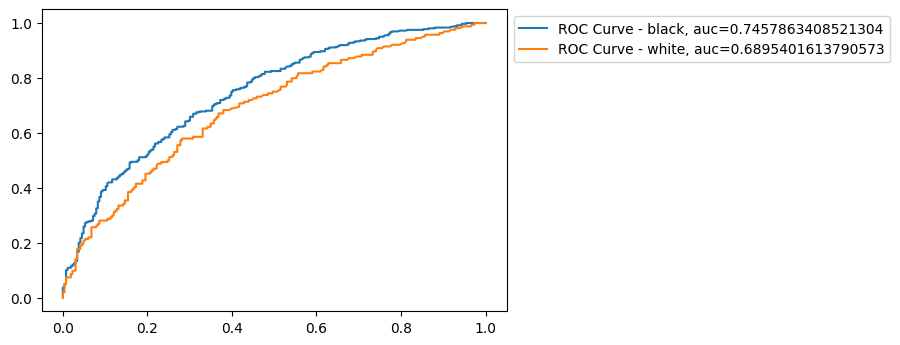

In [49]:
import matplotlib.pyplot as plt
from sklearn import metrics

from matplotlib.pyplot import figure

fig, ax = plt.subplots(figsize=(6, 4), dpi=100)

s1Preds = dnnmodel(test_x_s1).detach()
s0Preds = dnnmodel(test_x_s0).detach()

fpr_1, tpr_1, thresholds_m = metrics.roc_curve(test_y_s1, s1Preds)
auc = metrics.roc_auc_score(test_y_s1, s1Preds)
plt.plot(fpr_1,tpr_1,label=f'ROC Curve - {svals[1]}, auc={auc}')

fpr_0, tpr_0, thresholds_f = metrics.roc_curve(test_y_s0, s0Preds)
auc = metrics.roc_auc_score(test_y_s0, s0Preds)
plt.plot(fpr_0,tpr_0,label=f'ROC Curve - {svals[0]}, auc={auc}')

plt.legend(loc=0, bbox_to_anchor=(1,1))

#### Q5: (i) Do a calibration plot that plots the fraction of defendants recidividating within two years as a function of the predicted probability of recidivism, for black defendants and white defendants. (ii) Comment (in a couple of sentences) if you believe that the score satisfies sufficiency across racial groups.      (5 points)

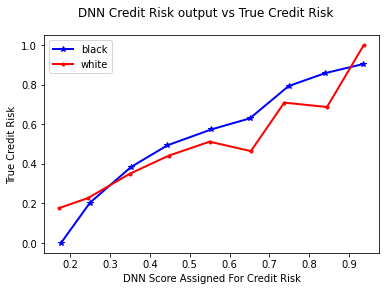

In [50]:
# YOUR CODE HERE 
from sklearn.calibration import calibration_curve
y_m, x_m = calibration_curve(
    test_y_s1, 
    s1Preds, 
    n_bins=10)

y_f, x_f = calibration_curve(
    test_y_s0, 
    s0Preds, 
    n_bins=10)






fig, ax = plt.subplots()

plt.plot(x_m, y_m, color='blue', 
         marker='*', 
         linewidth = 2, 
         label='black')

plt.plot(x_f, y_f, color='red', 
         marker='.', 
         linewidth = 2, 
         label='white')



# # reference line, legends, and axis labels
ax.set_xlabel('DNN Score Assigned For Credit Risk')
ax.set_ylabel('True Credit Risk')
fig.suptitle('DNN Credit Risk output vs True Credit Risk')
plt.legend()
plt.show()







Being sufficient means $Y \perp A \mid R$.  Sufficiency doesn't hold here, as whites are getting predicted to have higher credit risk even when their true credit risk isn't as high (the lines don't match up).  So, whites are getting discriminated against.

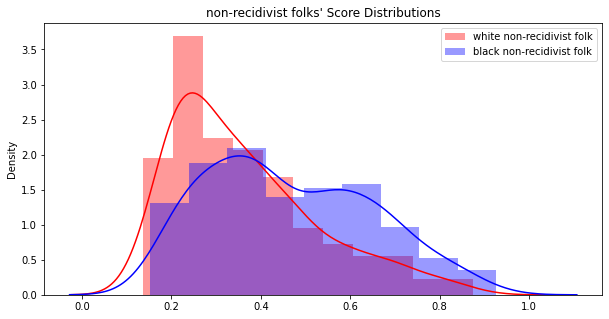

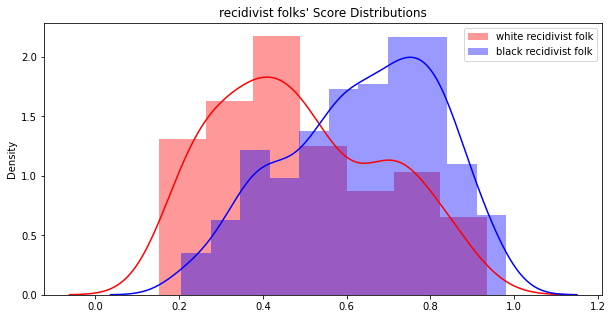

In [51]:
# YOUR CODE HERE

#print (test_y_s0.head())

def makeSeparationGraphs(model, test_x_s1_label0, test_x_s1_label1, test_x_s0_label0, test_x_s0_label1):
    blacklabel0Preds = model(test_x_s1_label0).detach()
    blacklabel1Preds = model(test_x_s1_label1).detach()

    whitelabel0Preds = model(test_x_s0_label0).detach()
    whitelabel1Preds = model(test_x_s0_label1).detach()

    import seaborn as sns
    plt.figure(figsize=(10,5))
    sns.distplot(whitelabel0Preds, 
                 color='red', 
                 label=f'{svals[0]} non-recidivist folk').set(title = "non-recidivist folks' Score Distributions")
    sns.distplot(blacklabel0Preds, 
                 color='blue', 
                 label=f'{svals[1]} non-recidivist folk').set(title = "non-recidivist folks' Score Distributions")
    plt.legend()

    plt.figure(figsize=(10,5))
    sns.distplot(whitelabel1Preds, 
                 color='red', 
                 label=f'{svals[0]} recidivist folk').set(title = 'recidivist folks\' Score Distributions')
    sns.distplot(blacklabel1Preds, 
                 color='blue', 
                 label=f'{svals[1]} recidivist folk').set(title = 'recidivist folks\' Score Distributions')
    plt.legend()
    
makeSeparationGraphs(dnnmodel, test_x_s1_label0, test_x_s1_label1, test_x_s0_label0, test_x_s0_label1)





Separation means that $R \perp A \mid Y$.  So given the true label of recidivism, the logistic regression output must be independent of the sens sensitive variable $A$.  This does NOT satisfy separation, because for both labels (non-recidivists and recidivists), we can see that the model outputted significantly lower scores for white people.

In [52]:
def falseaLossTrueLossSeparationHelper(model, data, labels, verbose=True, test_data = True):
    data = pd.DataFrame(data.numpy())
    labels = pd.DataFrame(labels.numpy())

    tempData = temptest_x
    if test_data == False:
        tempData = temptrain_x
    

    s0TrueData = data[(tempData[sensAttr] == 0).reset_index(drop=True) & (labels == 1).squeeze()]
    s0FalseData = data[(tempData[sensAttr] == 0).reset_index(drop=True) & (labels == 0).squeeze()]

    s1TrueData = data[(tempData[sensAttr] == 1).reset_index(drop=True) & (labels == 1).squeeze()]
    s1FalseData = data[(tempData[sensAttr] == 1).reset_index(drop=True) & (labels == 0).squeeze()]
    
    
    s0TrueData = torch.tensor(s0TrueData.values)
    s0FalseData = torch.tensor(s0FalseData.values)
    
    s1TrueData = torch.tensor(s1TrueData.values)
    s1FalseData = torch.tensor(s1FalseData.values)
    
    s0TruePreds = model(s0TrueData)
    s0FalsePreds = model(s0FalseData)
    
    s1TruePreds = model(s1TrueData)
    s1FalsePreds = model(s1FalseData)
    
    s0TruePosProb = (torch.sum(s0TruePreds.round())/len(s0TrueData))
    s0FalsePosProb = (torch.sum(s0FalsePreds.round())/len(s0FalseData))
    
    s1TruePosProb = (torch.sum(s1TruePreds.round())/len(s1TrueData))
    s1FalsePosProb = (torch.sum(s1FalsePreds.round())/len(s1FalseData))
    
    
    
    
    falseLoss = abs(s0FalsePosProb - s1FalsePosProb)
    trueLoss = abs(s0TruePosProb - s1TruePosProb)
    
    # R = model output
    # A = sens (0 = s0), (1 = s1)
    # Y = 0 (low risk), Y = 1 (high risk)
    
    if verbose:
        print ('Pr[R = 1 | A = 0, Y = 1]: ', s0TruePosProb.detach())
        print ('Pr[R = 1 | A = 1, Y = 1]: ', s1TruePosProb.detach())
        print ('Pr[R = 1 | A = 0, Y = 0]: ', s0FalsePosProb.detach())    
        print ('Pr[R = 1 | A = 1, Y = 0]: ', s1FalsePosProb.detach())
        print ('|P(R = 1 | A = 1, Y = 0) - P(R = 1 | A = 0, Y = 0)| = ', falseLoss.item())
        print ('|P(R = 1 | A = 1, Y = 1) - P(R = 1 | A = 0, Y = 1)| = ', trueLoss.item())
    return falseLoss.item(), trueLoss.item()

def paritySum(model, data, labels):
    fpParity, tpParity = falseaLossTrueLossSeparationHelper(model, data, labels)
    return fpParity + tpParity
    
def maxSeparation(model, data, labels):
    res = falseaLossTrueLossSeparationHelper(model, data, labels)
    return max(res[0], res[1])
    
def separation(model, data, labels):
    maxSep = maxSeparation(model, data, labels)
    eps = 0.05
    return (maxSep < eps)

def separationLoss(model, data, labels):
    falseLoss, trueLoss = falseaLossTrueLossSeparationHelper(model, data, labels, verbose=False)
    return falseLoss + trueLoss

print ('Does the model satisfy separation: ', separation(dnnmodel, test_x, test_y))

Pr[R = 1 | A = 0, Y = 1]:  tensor(0.4146)
Pr[R = 1 | A = 1, Y = 1]:  tensor(0.7611)
Pr[R = 1 | A = 0, Y = 0]:  tensor(0.1842)
Pr[R = 1 | A = 1, Y = 0]:  tensor(0.4173)
|P(R = 1 | A = 1, Y = 0) - P(R = 1 | A = 0, Y = 0)| =  0.23308269679546356
|P(R = 1 | A = 1, Y = 1) - P(R = 1 | A = 0, Y = 1)| =  0.3464770019054413
Does the model satisfy separation:  False


In [53]:
# creating new dataset

sensX = Data.drop(columns=[target, sensAttr])
sensY = Data[sensAttr]

senstrain_x, senstest_x, senstrain_y, senstest_y = train_test_split(sensX, sensY, test_size=0.2, random_state=137)

scaler = sklearn.preprocessing.StandardScaler()
senstrain_x = scaler.fit_transform(senstrain_x)
senstest_x = scaler.transform(senstest_x)

senstrain_x = torch.from_numpy(senstrain_x.astype(np.float32))
senstest_x = torch.from_numpy(senstest_x.astype(np.float32))

# Train_y is now a numpy object 
senstrain_y = list(senstrain_y)

# train_y is now a torch object 
senstrain_y = torch.as_tensor(senstrain_y, dtype = torch.float32)
senstest_y = torch.as_tensor(list(senstest_y), dtype=torch.float32)

senstrain_y = senstrain_y.view(senstrain_y.shape[0],1)
senstest_y = senstest_y.view(senstest_y.shape[0],1)

n_samples,n_features=senstrain_x.shape


In [79]:
from copy import deepcopy

batch_size = 10
sensTrainData = Dataset(senstrain_x, senstrain_y)
sensTrainDataLoader = torch.utils.data.DataLoader(sensTrainData, shuffle=True, batch_size=batch_size)
sensTestData = Dataset(senstest_x, senstest_y)
sensTestDataLoader = torch.utils.data.DataLoader(sensTestData, shuffle=True, batch_size=batch_size)


'''for child in dnnmodel.seq.children():
    for param in child.parameters():
        print (param)'''

savedModel = deepcopy(dnnmodel)

class SensDNNModel(torch.nn.Module):
    def __init__(self, savedModel):
        super(SensDNNModel,self).__init__()
        self.seq = savedModel.seq
        
        self.senslayer1 = torch.nn.Linear(50,50)
        self.senslayer2 = torch.nn.Linear(50,50)
        self.senslayer3 = torch.nn.Linear(50,1)
            
        self.sigmoid = torch.nn.Sigmoid()
        self.relu = torch.nn.ReLU()
        
        self.sensseq = torch.nn.Sequential(
            self.senslayer3,
            self.sigmoid
        )
        
        
        for child in self.seq.children():
            for param in child.parameters():
                #print (param)
                param.requires_grad = False

        self.seq.eval()
    
    def forward(self, x):
        return self.sensseq(self.seq(x))
        
sensdnnmodel = SensDNNModel(savedModel)

sensdnnepochs = 15
sensdnnlr = 1e-4
def BCELoss_class_weighted(weights):
    def loss(input, target):
        input = torch.clamp(input,min=1e-7,max=1-1e-7)
        bce = - weights[1] * target * torch.log(input) - (1 - target) * weights[0] * torch.log(1 - input)
        return torch.mean(bce)
    return loss


criterion = BCELoss_class_weighted(weights = [2*sens0weight, 2*sens1weight])
sensdnnoptimizer = torch.optim.Adam([param for param in sensdnnmodel.parameters() if param.requires_grad == True], lr=sensdnnlr, weight_decay = 1e-5)
for epoch in range(sensdnnepochs):
    #print ('hey')
    print ('epoch', epoch)
    train(epoch, sensdnnmodel, sensTrainDataLoader, sensdnnoptimizer, criterion, sensTestDataLoader)

print(accuracy(sensdnnmodel, senstest_x, senstest_y))
torch.save(sensdnnmodel, 'sensdnnmodel.pt')

        
    






epoch 0
Epoch: 0 	Training Loss: 0.648344 	Validation Loss: 0.640522
epoch 1
Epoch: 1 	Training Loss: 0.636296 	Validation Loss: 0.627145
epoch 2
Epoch: 2 	Training Loss: 0.627895 	Validation Loss: 0.619921
epoch 3
Epoch: 3 	Training Loss: 0.624053 	Validation Loss: 0.613931
epoch 4
Epoch: 4 	Training Loss: 0.620060 	Validation Loss: 0.610111
epoch 5
Epoch: 5 	Training Loss: 0.618137 	Validation Loss: 0.607267
epoch 6
Epoch: 6 	Training Loss: 0.617076 	Validation Loss: 0.606137
epoch 7
Epoch: 7 	Training Loss: 0.616587 	Validation Loss: 0.605213
epoch 8
Epoch: 8 	Training Loss: 0.615752 	Validation Loss: 0.603722
epoch 9
Epoch: 9 	Training Loss: 0.616011 	Validation Loss: 0.603246
epoch 10
Epoch: 10 	Training Loss: 0.616013 	Validation Loss: 0.602414
epoch 11
Epoch: 11 	Training Loss: 0.615581 	Validation Loss: 0.602066
epoch 12
Epoch: 12 	Training Loss: 0.615555 	Validation Loss: 0.602161
epoch 13
Epoch: 13 	Training Loss: 0.614535 	Validation Loss: 0.601832
epoch 14
Epoch: 14 	Traini

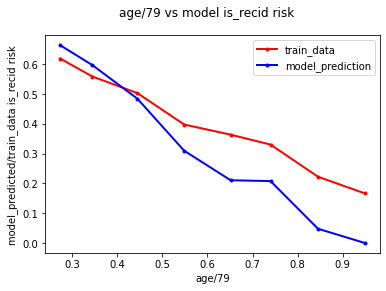

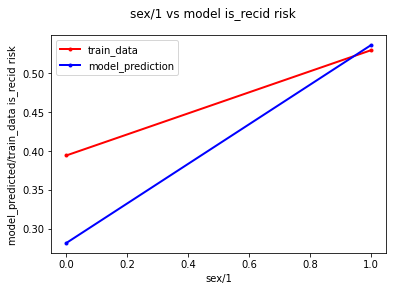

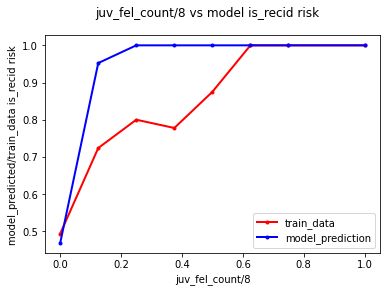

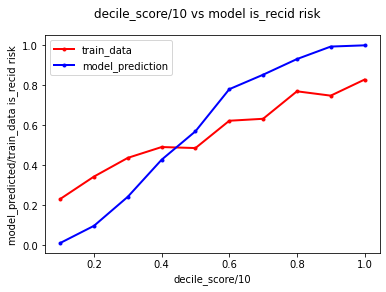

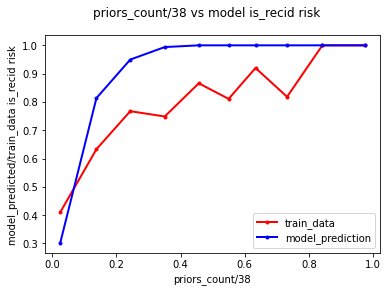

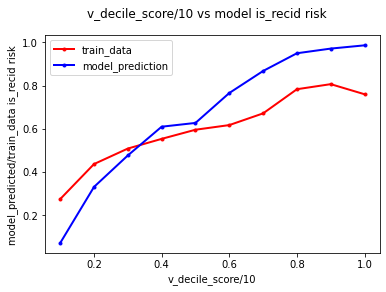

In [80]:
def test_correlation(var):
    
    div = max(temptrain_x[var])
    xd = [x/div for x in temptrain_x[var]]
    #print (xd)
    y_t, x_pc = calibration_curve(
        train_y,
        xd,
        n_bins=10)
    
    y_t2, x_pc2 = calibration_curve(
    dnnmodel.forward(train_x).detach().round(),
    [x/div for x in temptrain_x[var]],
    n_bins=10)


    fig, ax = plt.subplots()

    plt.plot(x_pc, y_t, color='red', 
             marker='.', 
             linewidth = 2, 
             label='train_data')
    
    plt.plot(x_pc2, y_t2, color='blue', 
             marker='.', 
             linewidth = 2, 
             label='model_prediction')



    # # reference line, legends, and axis labels
    ax.set_xlabel(f'{var}/{div}')
    ax.set_ylabel(f'model_predicted/train_data {target} risk')
    fig.suptitle(f'{var}/{div} vs model {target} risk')
    plt.legend()
    plt.show()
    
for feature in feature_names:
    test_correlation(feature)



Average Feature Importances
age :  0.007
sex :  -0.000
juv_fel_count :  0.002
decile_score :  -0.011
priors_count :  -0.035
v_decile_score :  0.001


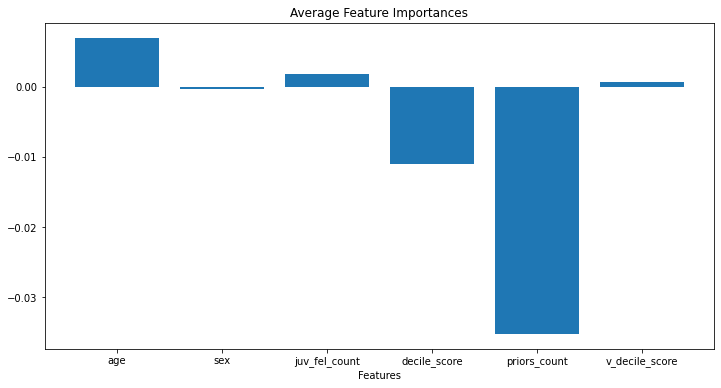

In [75]:
from captum.insights.attr_vis.features import GeneralFeature
from captum.insights import AttributionVisualizer, Batch

from captum.attr import IntegratedGradients, DeepLift, GradientShap
from captum.attr import LayerConductance
from captum.attr import NeuronConductance


def baseline_func(input):
    return input * 0

def formatted_data_iter(testDataLoader):
    dataloader = iter(testDataLoader)
    while True:
        images, labels = next(dataloader)
        yield Batch(inputs=images, labels=labels)

ig = IntegratedGradients(sensdnnmodel)

test_input_tensor = deepcopy(test_x)

test_input_tensor.requires_grad_()

attr, delta = ig.attribute(test_input_tensor, return_convergence_delta=True)
attr = attr.detach().numpy()

# Helper method to print importances and visualize distribution
def visualize_importances(feature_names, importances, title='Average Feature Importances', plot=True, axis_title='Features'):
    print(title)
    for i in range(len(feature_names)):
        print(feature_names[i], ': ', '%.3f'%(importances[i]))
    x_pos = (np.arange(len(feature_names)))
    if plot:
        plt.figure(figsize=(12,6))
        plt.bar(x_pos, importances, align='center')
        plt.xticks(x_pos, feature_names, wrap=True)
        plt.xlabel(axis_title)
        plt.title(title)
        

#print (feature_names)
        
visualize_importances(feature_names, np.mean(attr, axis=0))



Average Neuron Importances For Hidden Layer 1
0 :  0.003
1 :  -0.002
2 :  -0.002
3 :  -0.001
4 :  0.007
5 :  -0.006
6 :  0.003
7 :  0.002
8 :  0.003
9 :  0.001
10 :  -0.002
11 :  -0.003
12 :  0.002
13 :  -0.007
14 :  -0.000
15 :  -0.004
16 :  -0.001
17 :  -0.003
18 :  0.009
19 :  -0.002
20 :  -0.002
21 :  0.000
22 :  -0.007
23 :  0.004
24 :  -0.008
25 :  0.006
26 :  -0.007
27 :  0.000
28 :  0.001
29 :  -0.001
30 :  0.005
31 :  -0.019
32 :  0.001
33 :  0.002
34 :  -0.003
35 :  -0.000
36 :  0.007
37 :  -0.002
38 :  0.000
39 :  -0.003
40 :  -0.000
41 :  -0.007
42 :  -0.007
43 :  0.003
44 :  -0.002
45 :  0.002
46 :  0.001
47 :  0.003
48 :  0.001
49 :  -0.002
Average Neuron Importances For Hidden Layer 2
0 :  0.001
1 :  0.001
2 :  0.001
3 :  -0.011
4 :  0.006
5 :  -0.000
6 :  0.003
7 :  0.000
8 :  0.001
9 :  -0.001
10 :  -0.006
11 :  0.002
12 :  0.002
13 :  0.000
14 :  -0.004
15 :  0.002
16 :  -0.004
17 :  -0.001
18 :  -0.001
19 :  -0.000
20 :  -0.005
21 :  -0.007
22 :  0.000
23 :  -0.005
2

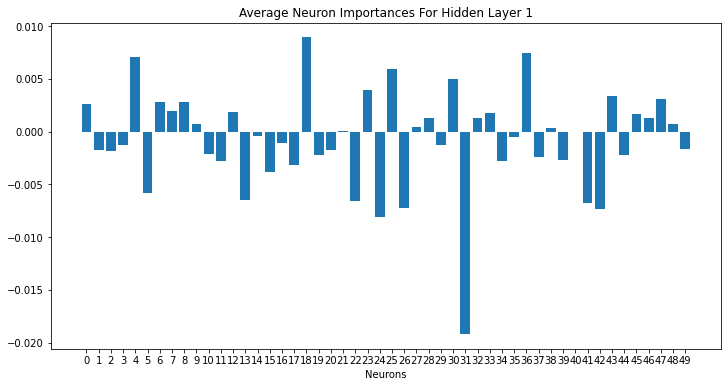

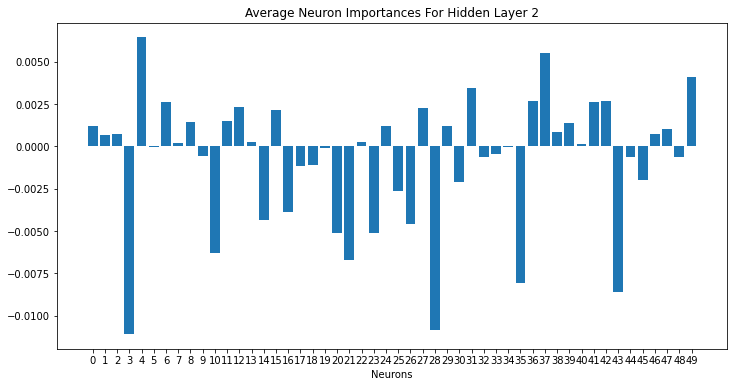

In [59]:
# Layer Conductance

cond = LayerConductance(sensdnnmodel, sensdnnmodel.seq[1]) # relu1
cond_vals = cond.attribute(test_input_tensor,target=0)
cond_vals = cond_vals.detach().numpy()
visualize_importances(range(50),np.mean(cond_vals, axis=0),title='Average Neuron Importances For Hidden Layer 1', axis_title='Neurons')

cond2 = LayerConductance(sensdnnmodel, sensdnnmodel.seq[3]) # relu2
cond_vals2 = cond2.attribute(test_input_tensor,target=0)
cond_vals2 = cond_vals2.detach().numpy()
visualize_importances(range(50),np.mean(cond_vals2, axis=0),title='Average Neuron Importances For Hidden Layer 2', axis_title='Neurons')



Average Feature Importances for Output Neuron0
age :  0.007
sex :  -0.000
juv_fel_count :  0.002
decile_score :  -0.011
priors_count :  -0.035
v_decile_score :  0.001


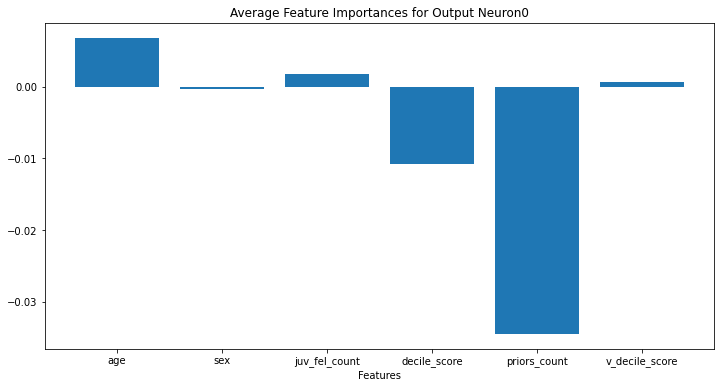

In [60]:
output_neuron_cond = NeuronConductance(sensdnnmodel, sensdnnmodel.sigmoid)
output_neuron_cond_vals = output_neuron_cond.attribute(test_input_tensor, neuron_selector=0, target=0)
visualize_importances(feature_names, output_neuron_cond_vals.mean(dim=0).detach().numpy(), title='Average Feature Importances for Output Neuron0')



OG Model Evaled on Med Accuracy:  0.6628788113594055
OG Model Evaled on Med Utility:  0.6625868105377948


(0.6628788113594055, 0.6625868105377948)

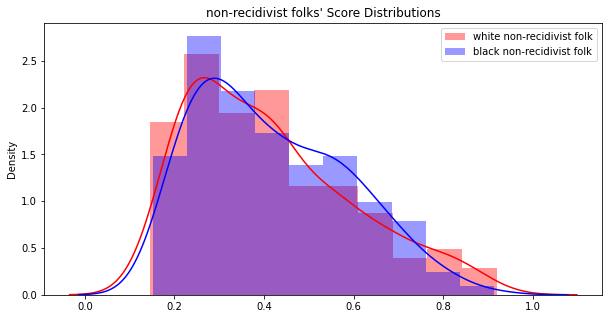

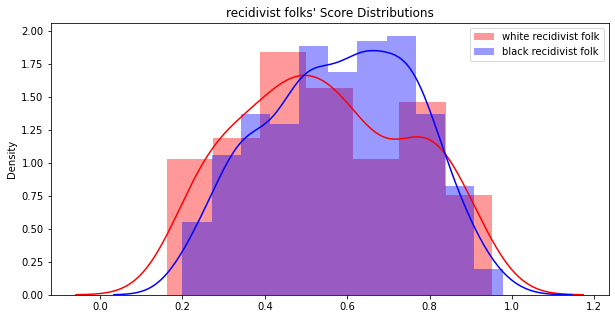

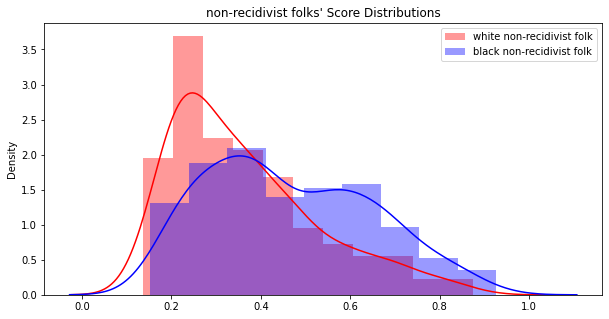

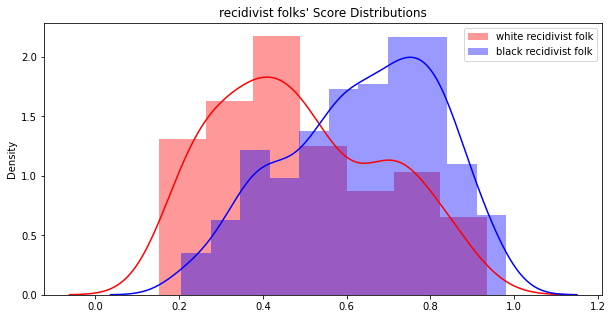

In [61]:
# median operation on input features



def getMedData(repLambda, sepGraphsShow = True):
    def upperbinsearch(arr, x):
        low = 0
        high = len(arr)
        while low + 1 < high:
            mid = low + (high - low)//2
            if arr[mid] <= x:
                low = mid
            else:
                high = mid
        return low

    def lowerbinsearch(arr, x):
        low = 0
        high = len(arr)
        while low + 1 < high:
            mid = low + (high - low)//2
            if arr[mid] < x:
                low = mid
            else:
                high = mid
        if high < len(arr) and arr[high] <= x:
            return high
        else:
            return low

    def calculatePercentile(arr, x):
        lowerbinresult = lowerbinsearch(arr, x)
        upperbinresult = upperbinsearch(arr, x)
        avgresult = (lowerbinresult + upperbinresult)/2
        return avgresult/len(arr)



    def convertDataset(groupsCopy, valsToSortedList, featureImportances, df_input = False):
        groups = deepcopy(groupsCopy)

        numFeatures = groups[0].shape[1]
        bd = None
        wd = None
        bd = pd.DataFrame(groups[0].numpy())
        wd = pd.DataFrame(groups[1].numpy())

        featureImportancesSorted = sorted([abs(robot) for robot in featureImportances], reverse = True)
        maxImportance = featureImportancesSorted[0]

        groupNames = [('black', bd), ('white', wd)]

        for tup in groupNames:
            curGroup = tup[0]
            data = tup[1]
            for dataCounter in range(len(data)):
                row = data.iloc[dataCounter]

                for i in range(numFeatures):
                    #print(valsToSortedList[i][curGroup])
                    percentile = calculatePercentile(valsToSortedList[i][curGroup], data.at[dataCounter, i])
                    allGroupsAtPercentile = list()
                    for group in valsToSortedList[i]:
                        groupArr = valsToSortedList[i][group]
                        valForGroup = groupArr[min(int(percentile * len(groupArr)), len(groupArr) - 1)]
                        allGroupsAtPercentile.append(valForGroup)

                    medianVal = statistics.median(allGroupsAtPercentile)

                    # replace value with weighted average of median and original value
                    #weight = 0
                    ftimp = (abs(featureImportances[i])/maxImportance)
                    weight = repLambda + (1-repLambda)*(abs(featureImportances[i])/maxImportance)
                    origVal = data.at[dataCounter, i]
                    data.at[dataCounter, i] = (weight*medianVal) + ((1 - weight)*origVal)
        return (bd, wd)

    def getFeatureDistributions(groups, df_input = False):

        #valsToSortedList = defaultdict(lambda: dict()) # maps sensitive attribute value to a map of columns to sorted lists
        numFeatures = groups[0].shape[1]
        valsToSortedList = [dict() for i in range(numFeatures)]

        bd = None
        wd = None
        if df_input == False:
            bd = pd.DataFrame(groups[0].numpy())
            wd = pd.DataFrame(groups[1].numpy())
        else:
            bd = groups[0]
            wd = groups[1]
        for i in range(numFeatures): # loop over all features

            whiteCol = wd.iloc[:,i].to_numpy().tolist()
            whiteCol.sort()

            blackCol = bd.iloc[:,i].to_numpy().tolist()
            blackCol.sort()

            valsToSortedList[i]['black'] = blackCol
            valsToSortedList[i]['white'] = whiteCol

        return valsToSortedList


    valsToSortedList = getFeatureDistributions([train_x_s1, train_x_s0])

    test_x_s1_df, test_x_s0_df = convertDataset([test_x_s1, test_x_s0], valsToSortedList, output_neuron_cond_vals.mean(dim=0).detach().numpy().tolist())
    dtype = test_x_s1.dtype

    test_x_s1_med, test_x_s0_med = torch.tensor(test_x_s1_df.values, dtype = dtype), torch.tensor(test_x_s0_df.values, dtype = dtype)

    train_x_s1_df, train_x_s0_df = convertDataset([train_x_s1, train_x_s0], valsToSortedList, output_neuron_cond_vals.mean(dim=0).detach().numpy().tolist())
    train_x_s1_med, train_x_s0_med = torch.tensor(train_x_s1_df.values, dtype = dtype), torch.tensor(train_x_s0_df.values, dtype = dtype)


    test_x_s1_label0_df, test_x_s0_label0_df = convertDataset([test_x_s1_label0, test_x_s0_label0], valsToSortedList, output_neuron_cond_vals.mean(dim=0).detach().numpy().tolist())
    test_x_s1_label1_df, test_x_s0_label1_df = convertDataset([test_x_s1_label1, test_x_s0_label1], valsToSortedList, output_neuron_cond_vals.mean(dim=0).detach().numpy().tolist())
    test_x_s1_label0_med, test_x_s0_label0_med = torch.tensor(test_x_s1_label0_df.values, dtype=dtype), torch.tensor(test_x_s0_label0_df.values, dtype=dtype)
    test_x_s1_label1_med, test_x_s0_label1_med = torch.tensor(test_x_s1_label1_df.values, dtype=dtype), torch.tensor(test_x_s0_label1_df.values, dtype=dtype)

    if sepGraphsShow == True:
        makeSeparationGraphs(dnnmodel, test_x_s1_label0_med, test_x_s1_label1_med, test_x_s0_label0_med, test_x_s0_label1_med)
        makeSeparationGraphs(dnnmodel, test_x_s1_label0, test_x_s1_label1, test_x_s0_label0, test_x_s0_label1)

    def mergeDatasets(black, white, trainData = False):
        data = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}
        newdataframe = pd.DataFrame(data)  
        blackPointer = 0
        whitePointer = 0
        mask = None
        if trainData:
            mask = (temptrain_x[sensAttr] == 1)
        else:
            mask = (temptest_x[sensAttr] == 1)
        for row in mask:
            if row == False:
                # white
                toAppend = white.iloc[whitePointer]
                newdataframe.loc[whitePointer + blackPointer] = toAppend
                whitePointer += 1
            else:
                # black     
                toAppend = black.iloc[blackPointer]
                newdataframe.loc[whitePointer + blackPointer] = toAppend
                blackPointer += 1
        return newdataframe

    test_x_med_df = mergeDatasets(test_x_s1_df, test_x_s0_df)
    train_x_med_df = mergeDatasets(train_x_s1_df, train_x_s0_df, trainData = True)
    test_x_med = torch.tensor(test_x_med_df.values, dtype = test_x.dtype)
    train_x_med = torch.tensor(train_x_med_df.values, dtype = train_x.dtype)

    return train_x_med,test_x_med,test_x_s1_label0_med,test_x_s0_label0_med,test_x_s1_label1_med,test_x_s0_label1_med

train_x_med, test_x_med, test_x_s1_label0_med,test_x_s0_label0_med,test_x_s1_label1_med,test_x_s0_label1_med = getMedData(repLambda = 0.5)
evaluateModel(dnnmodel, test_x_med, 'OG Model Evaled on Med')





In [62]:
print ('Does the model satisfy separation: ', separation(dnnmodel, test_x_med, test_y))

Pr[R = 1 | A = 0, Y = 1]:  tensor(0.5488)
Pr[R = 1 | A = 1, Y = 1]:  tensor(0.6583)
Pr[R = 1 | A = 0, Y = 0]:  tensor(0.2782)
Pr[R = 1 | A = 1, Y = 0]:  tensor(0.3195)
|P(R = 1 | A = 1, Y = 0) - P(R = 1 | A = 0, Y = 0)| =  0.04135337471961975
|P(R = 1 | A = 1, Y = 1) - P(R = 1 | A = 0, Y = 1)| =  0.10955286026000977
Does the model satisfy separation:  False


epoch 0
Epoch: 0 	Training Loss: 0.668514 	Validation Loss: 0.644341
epoch 1
Epoch: 1 	Training Loss: 0.615557 	Validation Loss: 0.618953
epoch 2
Epoch: 2 	Training Loss: 0.605702 	Validation Loss: 0.618454
epoch 3
Epoch: 3 	Training Loss: 0.601929 	Validation Loss: 0.618221
epoch 4
Epoch: 4 	Training Loss: 0.600624 	Validation Loss: 0.618748
epoch 5
Epoch: 5 	Training Loss: 0.599554 	Validation Loss: 0.616995
epoch 6
Epoch: 6 	Training Loss: 0.597800 	Validation Loss: 0.616522
epoch 7
Epoch: 7 	Training Loss: 0.596986 	Validation Loss: 0.614754
epoch 8
Epoch: 8 	Training Loss: 0.597108 	Validation Loss: 0.615762
epoch 9
Epoch: 9 	Training Loss: 0.596437 	Validation Loss: 0.613934
epoch 10
Epoch: 10 	Training Loss: 0.596557 	Validation Loss: 0.614419
epoch 11
Epoch: 11 	Training Loss: 0.594601 	Validation Loss: 0.614134
epoch 12
Epoch: 12 	Training Loss: 0.594137 	Validation Loss: 0.614239
epoch 13
Epoch: 13 	Training Loss: 0.593991 	Validation Loss: 0.613133
epoch 14
Epoch: 14 	Traini

(0.6628788113594055, 0.6625868105377948)

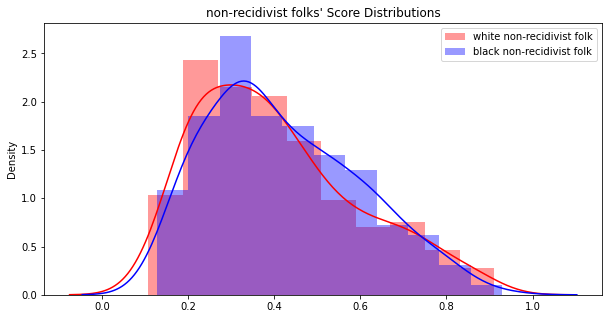

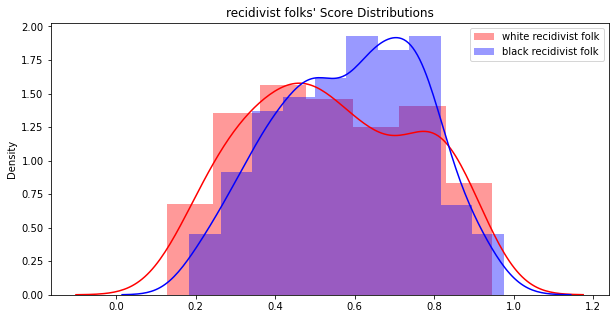

In [74]:
def retrainModelOnMedData(train_x_med, test_x_med, test_x_s1_label0_med,test_x_s0_label0_med,test_x_s1_label1_med,test_x_s0_label1_med, sepGraphsShow = True):
    batch_size = 10
    trainSignDataMed = Dataset(train_x_med, train_y)
    trainDataLoaderMed = torch.utils.data.DataLoader(trainSignDataMed, shuffle=True, batch_size=batch_size)
    testSignDataMed = Dataset(test_x_med, test_y)
    testDataLoaderMed = torch.utils.data.DataLoader(testSignDataMed, shuffle=True, batch_size=batch_size)
    torch.manual_seed(2724)
    dnnmodelmed = DNN_model(train_x_med.shape[1])
    dnnepochs = 15
    dnnlr = 1e-4
    criterion = torch.nn.BCELoss()
    dnnoptimizermed = torch.optim.Adam(dnnmodelmed.parameters(), lr=dnnlr, weight_decay=1e-5)
    for epoch in range(dnnepochs):
        #print ('hey')
        print ('epoch', epoch)
        train(epoch, dnnmodelmed, trainDataLoaderMed, dnnoptimizermed, criterion, testDataLoaderMed)

    torch.save(dnnmodelmed, 'dnnmodelmed.pt')
    if sepGraphsShow:
        makeSeparationGraphs(dnnmodelmed, test_x_s1_label0_med, test_x_s1_label1_med, test_x_s0_label0_med, test_x_s0_label1_med)
    return dnnmodelmed

dnnmodelmed = retrainModelOnMedData(train_x_med, test_x_med, test_x_s1_label0_med,test_x_s0_label0_med,test_x_s1_label1_med,test_x_s0_label1_med)
evaluateModel(dnnmodelmed, test_x_med, 'retrained model')



In [76]:
print ('Does the retrained model satisfy separation: ', separation(dnnmodelmed, test_x_med, test_y))

Pr[R = 1 | A = 0, Y = 1]:  tensor(0.5610)
Pr[R = 1 | A = 1, Y = 1]:  tensor(0.6667)
Pr[R = 1 | A = 0, Y = 0]:  tensor(0.2707)
Pr[R = 1 | A = 1, Y = 0]:  tensor(0.3195)
|P(R = 1 | A = 1, Y = 0) - P(R = 1 | A = 0, Y = 0)| =  0.048872172832489014
|P(R = 1 | A = 1, Y = 1) - P(R = 1 | A = 0, Y = 1)| =  0.10569107532501221
Does the retrained model satisfy separation:  False


## Experiment section

Set different lambdas for the partial repair, plot fairness (TP-Parity + FP-Parity) vs balanced accuracy tradeoff.

In [82]:
#print (test_x)
#print (senstest_x)

print("accuracy of sensdnnmodel evaled on debiased data: ", accuracy(sensdnnmodel, test_x_med, senstest_y))

retrainedsensdnnmodel = SensDNNModel(savedModel)
retrainedsensdnnoptimizer = torch.optim.Adam([param for param in retrainedsensdnnmodel.parameters() if param.requires_grad == True], lr=sensdnnlr, weight_decay = 1e-5)

batch_size = 10
trainSignDataMed = Dataset(train_x_med, senstrain_y)
trainDataLoaderMed = torch.utils.data.DataLoader(trainSignDataMed, shuffle=True, batch_size=batch_size)
testSignDataMed = Dataset(test_x_med, senstest_y)
testDataLoaderMed = torch.utils.data.DataLoader(testSignDataMed, shuffle=True, batch_size=batch_size)
for epoch in range(sensdnnepochs):
    #print ('hey')
    print ('epoch', epoch)
    train(epoch, retrainedsensdnnmodel, trainDataLoaderMed, retrainedsensdnnoptimizer, criterion, testDataLoaderMed)
    
print("accuracy of retrained sensdnnmodel evaled on debiased data: ", accuracy(retrainedsensdnnmodel, test_x_med, senstest_y))



accuracy of sensdnnmodel evaled on debiased data:  0.5653409361839294
epoch 0
Epoch: 0 	Training Loss: 0.662901 	Validation Loss: 0.663038
epoch 1
Epoch: 1 	Training Loss: 0.662426 	Validation Loss: 0.662766
epoch 2
Epoch: 2 	Training Loss: 0.661859 	Validation Loss: 0.662716
epoch 3
Epoch: 3 	Training Loss: 0.661680 	Validation Loss: 0.662284
epoch 4
Epoch: 4 	Training Loss: 0.661518 	Validation Loss: 0.662397
epoch 5
Epoch: 5 	Training Loss: 0.661432 	Validation Loss: 0.662327
epoch 6
Epoch: 6 	Training Loss: 0.661730 	Validation Loss: 0.662160
epoch 7
Epoch: 7 	Training Loss: 0.661333 	Validation Loss: 0.661760
epoch 8
Epoch: 8 	Training Loss: 0.660895 	Validation Loss: 0.661774
epoch 9
Epoch: 9 	Training Loss: 0.660631 	Validation Loss: 0.661742
epoch 10
Epoch: 10 	Training Loss: 0.660955 	Validation Loss: 0.661262
epoch 11
Epoch: 11 	Training Loss: 0.660612 	Validation Loss: 0.661254
epoch 12
Epoch: 12 	Training Loss: 0.660245 	Validation Loss: 0.660859
epoch 13
Epoch: 13 	Trainin

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def makeAccuracyFairnessGraph(model, stepSize = 0.05):
    # Fixing random state for reproducibility
    np.random.seed(19680801)


    x = []
    y = []
    repLambda = 0
    while repLambda <= 1:
        print (repLambda)
        train_x_med, test_x_med = getMedData(repLambda, sepGraphsShow = False)
        acc, ut = evaluateModel(model, test_x_med, verbose=False)
        p = paritySum(model, test_x_med, test_y)
        x.append(p)
        y.append(ut)
        
        repLambda += stepSize

    plt.scatter(x, y, c='black')
    plt.xlabel('TP-Parity + FP-Parity')
    plt.ylabel('Balanced Accuracy Score')
    plt.show()

makeAccuracyFairnessGraph(dnnmodel)


In [ ]:
fig, axs = plt.subplots(nrows = 3, ncols=3, figsize=(15, 20))

feature_names.append(sensAttr)
for i, (ax, col) in enumerate(zip(axs.flat, feature_names)):
    print (i, (ax,col))
    x = Data[col]
    y = Y
    #x = X[:,i]
    pf = np.polyfit(x, y, 1)
    p = np.poly1d(pf)

    ax.plot(x, y, 'o')
    ax.plot(x, p(x),'r--')

    ax.set_title(col + ' vs is_recid')
    ax.set_xlabel(col)
    ax.set_ylabel(target)